<h2> Life Expectancy Case Study</h2>

You are given a dataset of the Wealth Health Organisation recording population data pertaining to Life expectancy and have been asked to perform <b>Exploratory Data Analysis</b> and identify 
various <b>factors affecting Life Expectancy</b>.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('dataset/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<h5 style="color:blue">Activity 1: Describe the dataset</h5>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<h5 style="color:blue">Activity 2: Checking and Handling Missing values</h5>

<b>Rows with missing values</b>

In [4]:
# Check for missing values in each row
rows_with_missing = df.isnull().any(axis=1)
num_records_w_missing_vals = rows_with_missing.sum()
print(f'Number of records with missing values: {num_records_w_missing_vals}')

Number of records with missing values: 1289


In [5]:
rows_with_missing_values_df = df[rows_with_missing]
rows_with_missing_values_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7


<b>Columns with missing values</b>

In [6]:
# Count of missing values per column
missing_counts = df.isnull().sum()
columns_with_missing = missing_counts[missing_counts > 0].index.tolist()
columns_with_missing

['Life expectancy ',
 'Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [7]:
unclean_df = df[columns_with_missing]#filter columns
unclean_df_filtered = unclean_df[rows_with_missing]#filter rows
unclean_df_filtered.head()

,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,75.6,19.0,NaN,95.0,59.5,95.0,NaN,95.0,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,71.7,146.0,0.34,NaN,47.0,87.0,3.60,87.0,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,71.6,145.0,0.36,NaN,46.1,86.0,3.73,86.0,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,71.4,145.0,0.23,NaN,45.3,89.0,3.84,89.0,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,71.3,145.0,0.25,NaN,44.4,86.0,3.49,86.0,1757.177970,3118366.0,6.5,6.4,0.636,10.7


<b>Unhandling missing values</b><br/>

There are two ways to handle missing values:
<ul>
    <li>Data imputation</li>
    <li>Dropping of rows/columns</li>
</ul>

In [8]:
#Data Imputation (Method 1)
clean_df_m1 = unclean_df.fillna(unclean_df.mean())
clean_df_filtered_m1 = clean_df_m1[rows_with_missing]
clean_df_filtered_m1.head()

,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,75.6,19.0,4.602861,95.000000,59.5,95.0,5.93819,95.0,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,71.7,146.0,0.340000,80.940461,47.0,87.0,3.60000,87.0,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,71.6,145.0,0.360000,80.940461,46.1,86.0,3.73000,86.0,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,71.4,145.0,0.230000,80.940461,45.3,89.0,3.84000,89.0,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,71.3,145.0,0.250000,80.940461,44.4,86.0,3.49000,86.0,1757.177970,3118366.0,6.5,6.4,0.636,10.7


In [9]:
print(f'Records before cleaning: {len(df)}\nRecords after cleaning: {len(clean_df_m1)}')

Records before cleaning: 2938
Records after cleaning: 2938


In [10]:
#Records droping (Method 2)
clean_df_m2 = unclean_df.dropna()
clean_df_m2.head()

,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,0.01,65.0,19.1,6.0,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,0.01,62.0,18.6,58.0,8.18,62.0,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,0.01,64.0,18.1,62.0,8.13,64.0,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,0.01,67.0,17.6,67.0,8.52,67.0,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,0.01,68.0,17.2,68.0,7.87,68.0,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
print(f'Records before cleaning: {len(df)}\nRecords after cleaning: {len(clean_df_m2)}')

Records before cleaning: 2938
Records after cleaning: 1649


<h5 style="color:blue">Activity 3: EDA - Variable Distribution</h5>

<b>Numeric Variable</b>

In [12]:
clean_df_m1.columns

Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

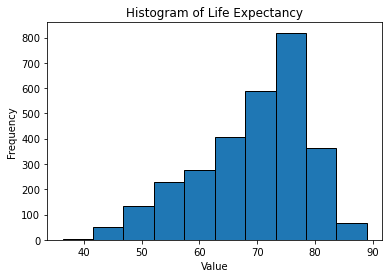

In [13]:
import matplotlib.pyplot as plt


# Histogram
plt.hist(clean_df_m1['Life expectancy '], bins=10, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Life Expectancy')
plt.show()


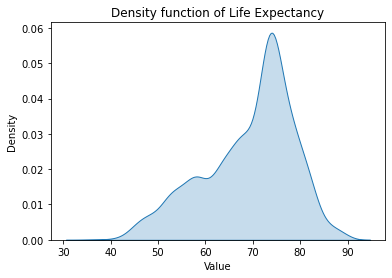

In [14]:
import seaborn as sns

# KDE Plot
sns.kdeplot(clean_df_m1['Life expectancy '], fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density function of Life Expectancy')
plt.show()

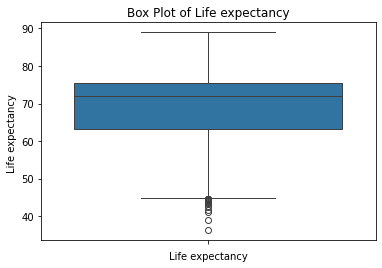

In [15]:
sns.boxplot(clean_df_m1['Life expectancy '])
plt.xlabel('Life expectancy')
plt.title('Box Plot of Life expectancy')
plt.show()

In [20]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<b>Categorical Variable</b>

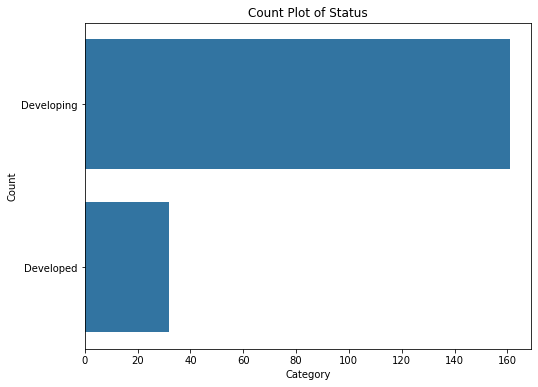

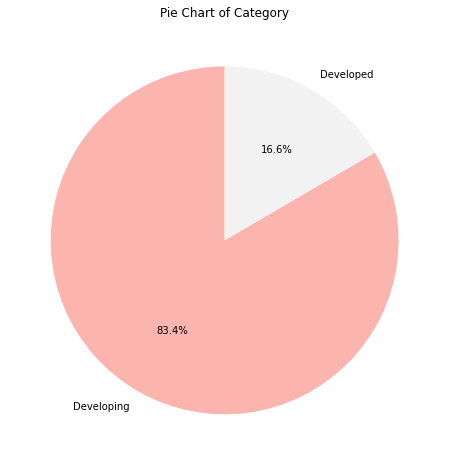

In [21]:
df_ = df[["Country","Status"]].drop_duplicates().reset_index(drop=True)

# Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(df_['Status']) #x='Status', data=clean_df_m1)
plt.title('Count Plot of Status')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

 #Pie Chart
plt.figure(figsize=(8, 8))
df_['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="Pastel1")
plt.title('Pie Chart of Category')
plt.ylabel('')  # Hide y-axis label for aesthetic
plt.show()

<h5 style="color:blue">Activity 4: EDA - Relationships</h5>

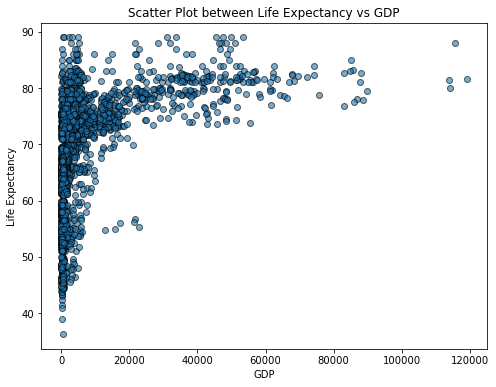

In [39]:
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter( df["GDP"], df["Life expectancy "], alpha=0.6, edgecolor='k')
plt.title("Scatter Plot between Life Expectancy vs GDP")
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
#plt.grid(True)
plt.show()

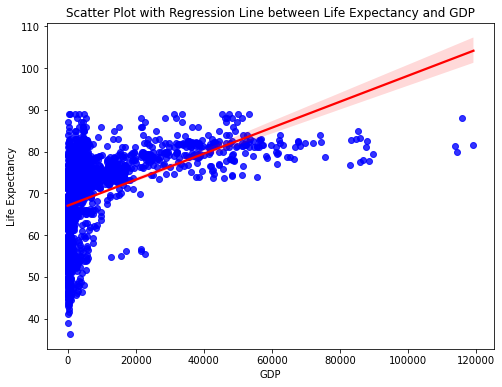

In [40]:
plt.figure(figsize=(8, 6))
sns.regplot(x="GDP", y="Life expectancy ", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Scatter Plot with Regression Line between Life Expectancy and GDP")
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
#plt.grid(True)
plt.show()

<h5 style="color:blue">Activity 5: Hypothesis Testing</h5>

<b>Relationship between GDP and Life Expectancy</b>

Null Hypothesis: 
$$
H_0: \rho = 0
$$
Alternate Hypothesis:
$$
H_1: \rho \neq 0
$$

if p > $\alpha$, accept the null hypothesis<br/>
if p $\leq \alpha$, reject the null hypothesis, in favour of the alternate hypothesis

In [45]:
from scipy.stats import pearsonr

# Perform Pearson's correlation test
correlation_coefficient, p_value = pearsonr(clean_df_m1["Life expectancy "], clean_df_m1["GDP"])
# Display results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a statistically significant correlation between Life Expectancy and GDP (p < 0.05).")
else:
    print("There is no statistically significant correlation between Life Expectancy and GDP(p >= 0.05).")


Pearson Correlation Coefficient: 0.43049301854946415
P-value: 7.22920497122998e-133
There is a statistically significant correlation between Life Expectancy and GDP (p < 0.05).


In [49]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

<b>Difference between Life Expectancy of Developping Countries and Non-Developping Countries</b>

Null Hypothesis: 
$$
H_0: \mu_{\text{Developed}} = \mu_{\text{Developing}}
$$
Alternate Hypothesis: 
$$
H_1: \mu_{\text{Developed}} \neq \mu_{\text{Developing}}
$$

if p > $\alpha$, accept the null hypothesis<br/>
if p $\leq \alpha$, reject the null hypothesis, in favour of the alternate hypothesis

In [57]:
import pandas as pd
from scipy.stats import ttest_ind

df = df.dropna(subset=["Life expectancy "])#drop data with null values
# Split the data into two groups: Developed and Developing
developed_life_exp = df[df["Status"] == "Developed"]["Life expectancy "]
developing_life_exp = df[df["Status"] == "Developing"]["Life expectancy "]

# Perform an independent samples t-test
t_stat, p_value = ttest_ind(developed_life_exp, developing_life_exp, equal_var=True)

# Display results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in life expectancy between developed and developing countries.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in life expectancy between developed and developing countries.")


T-statistic: 29.76836505889292
P-value: 2.4650861700062064e-170
Reject the null hypothesis: There is a statistically significant difference in life expectancy between developed and developing countries.
